In [1]:
import pandas as pd
import numpy as np

In [2]:
ds = pd.read_csv('routes.csv')
ds.head()



,airline,airline ID,source airport,source airport id,destination apirport,destination airport id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [3]:
ds.columns

Index(['airline', 'airline ID', ' source airport', ' source airport id',
       ' destination apirport', ' destination airport id', ' codeshare',
       ' stops', ' equipment'],
      dtype='object')

In [4]:
#dropping columns 
col_drop = ['airline ID', ' source airport id', ' destination airport id', ' codeshare', ' equipment', ' stops'] 
ds_c = ds.drop(col_drop, axis=1)
ds_c

,airline,source airport,destination apirport
0,2B,AER,KZN
1,2B,ASF,KZN
2,2B,ASF,MRV
3,2B,CEK,KZN
4,2B,CEK,OVB
...,...,...,...
67658,ZL,WYA,ADL
67659,ZM,DME,FRU
67660,ZM,FRU,DME
67661,ZM,FRU,OSS


In [5]:
# renaming column
df = ds_c.rename(columns={'airline': 'Airline', ' source airport': 'Source Airport', ' destination apirport': 'Destination Airport'})#, inplace=True)


In [6]:
df

,Airline,Source Airport,Destination Airport
0,2B,AER,KZN
1,2B,ASF,KZN
2,2B,ASF,MRV
3,2B,CEK,KZN
4,2B,CEK,OVB
...,...,...,...
67658,ZL,WYA,ADL
67659,ZM,DME,FRU
67660,ZM,FRU,DME
67661,ZM,FRU,OSS


In [7]:
# Sorting data from Source airports
source = df.sort_values(by=['Source Airport'])
source.head()


,Airline,Source Airport,Destination Airport
10042,AH,AAE,LYS
10041,AH,AAE,IST
10044,AH,AAE,ORN
10045,AH,AAE,ORY
10040,AH,AAE,CDG


In [8]:
group_source = pd.get_dummies(source['Source Airport'])
group_source.head()

,AAE,AAL,AAN,AAQ,AAR,AAT,AAX,AAY,ABA,ABB,...,ZSA,ZSE,ZSJ,ZTB,ZTH,ZUH,ZUM,ZVK,ZYI,ZYL
10042,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10041,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10044,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10045,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10040,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Counting the number of destinations in each airport
count = group_source['DXB'].value_counts()
count.head()

0    67307
1      356
Name: DXB, dtype: int64

In [10]:
# counting the total number of destinations per source airport
sourc_airport = pd.get_dummies(source['Source Airport']).sum().sort_values(ascending=False)
sourc_airport.head(20)

ATL    915
ORD    558
PEK    535
LHR    527
CDG    524
FRA    497
LAX    492
DFW    469
JFK    456
AMS    453
PVG    411
SIN    408
BCN    391
ICN    370
MUC    368
MIA    368
DEN    361
IST    358
LGW    356
DXB    356
dtype: int64

In [11]:
destinations = pd.DataFrame(sourc_airport)
destinations.head(10)

,0
ATL,915
ORD,558
PEK,535
LHR,527
CDG,524
FRA,497
LAX,492
DFW,469
JFK,456
AMS,453


In [12]:
destinations1 = destinations.rename(columns={0: 'Nº. of Destinations'})
destinations1.head(10)

,Nº. of Destinations
ATL,915
ORD,558
PEK,535
LHR,527
CDG,524
FRA,497
LAX,492
DFW,469
JFK,456
AMS,453


In [13]:
air = pd.read_csv('airportdata_public2.csv')
air.head()

,IATA,Airport,Location,Area,Passenger Role,2010,2011,2012,2013,2014,2015,2016,2017
0,AAC,El Arish International Airport,El Arish,north_africa,Non-Hub,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAE,Rabah Bitat Airport,Annaba,north_africa,Non-Hub,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAL,Aalborg Airport,Aalborg,nordics,Small,0.0,0.0,0.0,0.0,0.0,1440477.0,0.0,0.0
3,AAN,Al Ain International Airport,Al Ain,middle_east,Non-Hub,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAQ,Anapa Airport,Anapa,russia,Small,0.0,0.0,0.0,0.0,0.0,1178984.0,0.0,0.0


In [14]:
airport_dict = dict(zip(air.IATA,air.Airport))
airport_dict

{'AAC': 'El Arish International Airport',
 'AAE': 'Rabah Bitat Airport',
 'AAL': 'Aalborg Airport',
 'AAN': 'Al Ain International Airport',
 'AAQ': 'Anapa Airport',
 'AAR': 'Aarhus Airport',
 'ABA': 'Abakan International Airport',
 'ABB': 'Asaba International Airport',
 'ABJ': 'Port Bouet Airport',
 'ABQ': 'Albuquerque International Sunport',
 'ABV': 'Nnamdi Azikiwe International Airport',
 'ABZ': 'Aberdeen Airport',
 'ACA': 'General Juan N. Alvarez International Airport',
 'ACC': 'Kotoka International Airport',
 'ACE': 'Lanzarote Airport',
 'ACH': 'St. Gallen-Altenrhein Airport',
 'ACY': 'Atlantic City International Airport',
 'ADA': 'Şakirpaşa Airport',
 'ADB': 'Adnan Menderes Airport',
 'ADD': 'Addis Ababa Bole International Airport',
 'ADE': 'Aden International Airport',
 'ADJ': 'Amman Civil Airport',
 'ADL': 'Adelaide Airport',
 'ADZ': 'Gustavo Rojas Pinilla International Airport',
 'AEP': 'Aeroparque Jorge Newbery',
 'AER': 'Sochi International Airport',
 'AES': 'Ålesund Airport'

In [15]:
destinations1['Airport name'] = destinations1.index.map(airport_dict)
destinations1.head(10)

,Nº. of Destinations,Airport name
ATL,915,Hartsfield-Jackson Atlanta International Airport
ORD,558,O'Hare International Airport
PEK,535,Beijing Capital International Airport
LHR,527,Heathrow Airport
CDG,524,Charles de Gaulle Airport
FRA,497,Frankfurt Airport
LAX,492,Los Angeles International Airport
DFW,469,Dallas/Fort Worth International Airport
JFK,456,John F. Kennedy International Airport
AMS,453,Amsterdam Airport Schiphol


In [16]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()

In [23]:
destinations1.dtypes

Nº. of Destinations     int64
Airport name           object
dtype: object

Text(0, 0.5, 'Number of destinations')

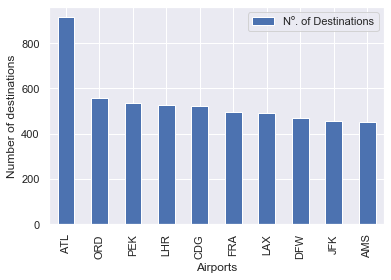

In [17]:
destinations1.head(10).plot.bar()
plt.xlabel('Airports')
plt.ylabel('Number of destinations')

In [18]:
# Sorting data from Destination airports
destin = df.sort_values(by=['Destination Airport'])
destin.head()


,Airline,Source Airport,Destination Airport
10135,AH,CDG,AAE
10181,AH,IST,AAE
10189,AH,LYS,AAE
10049,AH,ALG,AAE
10200,AH,MRS,AAE


In [19]:
group_destin = pd.get_dummies(source['Destination Airport']).sum().sort_values(ascending=False)
group_destin.head()

ATL    911
ORD    550
PEK    534
LHR    524
CDG    517
dtype: int64

In [20]:
sources = pd.DataFrame(group_destin)
sources.head(10)

,0
ATL,911
ORD,550
PEK,534
LHR,524
CDG,517
LAX,498
FRA,493
DFW,467
JFK,455
AMS,450


In [21]:
sources1 = sources.rename(columns={0: 'Nº. of flights to this airport'})
sources1.head(10)

,Nº. of flights to this airport
ATL,911
ORD,550
PEK,534
LHR,524
CDG,517
LAX,498
FRA,493
DFW,467
JFK,455
AMS,450


In [22]:
sources1['Airport name'] = sources1.index.map(airport_dict)
sources1.head(10)

,Nº. of flights to this airport,Airport name
ATL,911,Hartsfield-Jackson Atlanta International Airport
ORD,550,O'Hare International Airport
PEK,534,Beijing Capital International Airport
LHR,524,Heathrow Airport
CDG,517,Charles de Gaulle Airport
LAX,498,Los Angeles International Airport
FRA,493,Frankfurt Airport
DFW,467,Dallas/Fort Worth International Airport
JFK,455,John F. Kennedy International Airport
AMS,450,Amsterdam Airport Schiphol
